In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

C:\Users\simpp\AppData\Local\Temp\ipykernel_17672\2364773215.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


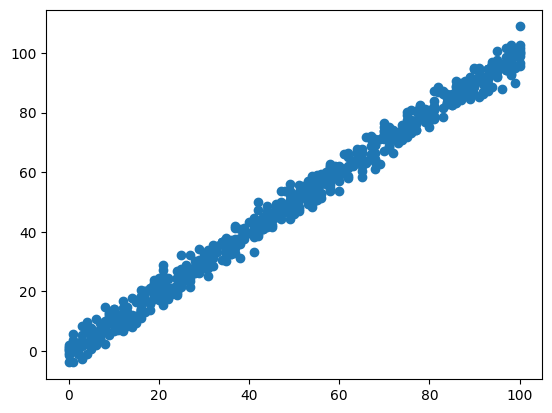

In [5]:
plt.scatter(data.x, data.y)

In [ ]:
def loss_function(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        total_error += (y - (m * x + b) ** 2)
    return total_error // n

In [21]:
# gradient descent function implementation from scratch for linear regression on a data with two columns x and y - getting (nan, nan) as the output


def loss_function(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        total_error += (y - (m * x + b) ** 2)
    return total_error // n


def gradient_descent(points, starting_m, starting_b, learning_rate, num_iterations):
    m = starting_m
    b = starting_b
    for i in range(num_iterations):
        m, b = step_gradient(m, b, points, learning_rate)
    return m, b

def step_gradient(m, b, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        # print(x, y)
        m_gradient += -(2/n) * x * (y - (m * x + b))
        b_gradient += -(2/n) * (y - (m * x + b))
    new_m = m - (learning_rate * m_gradient)
    new_b = b - (learning_rate * b_gradient)
    return new_m, new_b

def run():
    points = data
    learning_rate = 0.0001
    initial_m = 0
    initial_b = 0
    num_iterations = 10
    print("Starting gradient descent at m = {0}, b = {1}, error = {2}".format(initial_m, initial_b, loss_function(initial_m, initial_b, points)))
    print("Running...")
    m, b = gradient_descent(points, initial_m, initial_b, learning_rate, num_iterations)
    print("After {0} iterations m = {1}, b = {2}, error = {3}".format(num_iterations, m, b, loss_function(m, b, points)))
    return m, b

run()

Starting gradient descent at m = 0, b = 0, error = nan
Running...
After 10 iterations m = nan, b = nan, error = nan


(nan, nan)

In [20]:
run()

Starting gradient descent at m = 0, b = 0, error = nan
Running...
After 10 iterations m = nan, b = nan, error = nan


(nan, nan)

In [6]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        m_gradient += -(2 / n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2 / n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    
    return m, b

In [10]:
m = 0
b = 1
L = 0.0001
epochs = 100


In [11]:
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 50 == 0:
        print(f"Epoch: {i}")
print(m, b)

Epoch: 0
Epoch: 50
nan nan


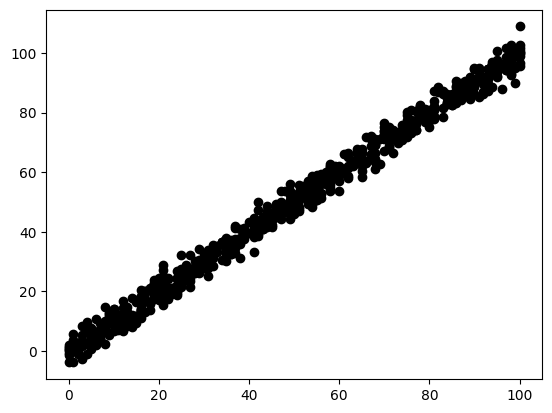

In [12]:
plt.scatter(data.x, data.y, color="black")
plt.plot(list(range(0, 100)), [m * x + b for x in range(0, 100)], color="red")